Internship on Data Science and Analytics - Project 1 - Credit Score Classiﬁcation Model Development

Phase 3: Week 3 - Model Optimization and Validation

* Objective : Optimize the selected model and validate its performance

In [4]:
import pandas as pd

# Reading the CSV files
train_data = pd.read_csv('/content/credit_train_data.csv')
test_data = pd.read_csv('/content/credit_test_data.csv')
val_data = pd.read_csv('/content/credit_val_data.csv')

# Separating features and target variable
X_train = train_data.drop(columns=['Credit_Score'])
y_train = train_data['Credit_Score']

X_test = test_data.drop(columns=['Credit_Score'])
y_test = test_data['Credit_Score']

X_val = val_data.drop(columns=['Credit_Score'])
y_val = val_data['Credit_Score']


In [5]:
# Printing the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

Training set shape: (70000, 7) (70000,)
Test set shape: (15000, 7) (15000,)
Validation set shape: (15000, 7) (15000,)


In [6]:
X_train.head(2)

,Age,Annual_Income,Monthly_Inhand_Salary,Credit_Mix,Credit_History_Age,Amount_invested_monthly,Monthly_Balance
0,21,151649.36,12823.446667,2,359.0,119.785966,564.160553
1,26,100465.14,8279.095000,2,393.0,127.271779,912.787408


In [7]:
y_train.head(2)

0    0
1    1
Name: Credit_Score, dtype: int64

Model Training without Hyperparameter Tuning

*   Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Building Model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate Model
y_pred = rf_classifier.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      4367
           1       0.81      0.82      0.82      7946
           2       0.79      0.76      0.77      2687

    accuracy                           0.81     15000
   macro avg       0.80      0.79      0.80     15000
weighted avg       0.81      0.81      0.81     15000



Accuracy : 0.81

Hyperparameter Tuning & Cross-Validation

In [17]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Defining the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

"""
 param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
"""

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42,n_jobs=-1)

# Perform hyperparameter tuning on the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluating the model performance on the testing data
# best_model = random_search.best_estimator_
# y_pred = best_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy on test set:", accuracy)

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


Cross Validation Used : 5 fold (cv=5)

Performance Validation

*   Training the classifier with the best parameters on the entire training dataset




In [20]:
# Train the classifier with the best parameters on the entire training dataset
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = best_rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8054


Confusion Matrix

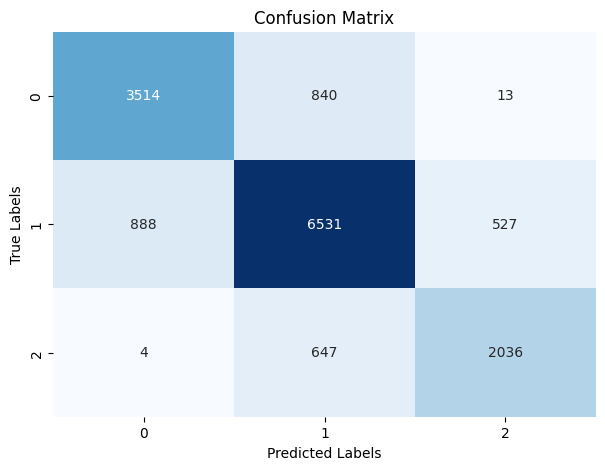

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Ploting confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Threshold Selection

In [22]:
import numpy as np

# Predict probabilities for each class
y_pred_proba = best_rf_classifier.predict_proba(X_test)

# Function to apply threshold and predict class labels
def predict_with_threshold(y_pred_proba, threshold):
    y_pred_thresholded = np.argmax(y_pred_proba, axis=1)
    max_probabilities = np.max(y_pred_proba, axis=1)
    y_pred_thresholded[max_probabilities < threshold] = -1  # Assign a negative class label for instances below threshold
    return y_pred_thresholded

# Define a range of thresholds to try
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

# Evaluate model performance for each threshold
for threshold in thresholds:
    y_pred_thresholded = predict_with_threshold(y_pred_proba, threshold)
    print(f"Threshold: {threshold}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_thresholded))
    print("Accuracy:", accuracy_score(y_test, y_pred_thresholded))
    print("="*50)


Threshold: 0.3
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      4367
           1       0.81      0.82      0.82      7946
           2       0.79      0.76      0.77      2687

    accuracy                           0.81     15000
   macro avg       0.80      0.79      0.80     15000
weighted avg       0.81      0.81      0.81     15000

Accuracy: 0.8054
Threshold: 0.4
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.80      0.80      0.80      4367
           1       0.82      0.82      0.82      7946
           2       0.79      0.76      0.77      2687

    accuracy                           0.80     15000
   macro avg       0.60      0.60      0.60     15000
weighted avg       0.81      0.80      0.81     15000

Accuracy: 0.8042666666666667
Threshold: 0.5
Classification Report:
              precision 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.82      0.69      0.75      4367
           1       0.87      0.76      0.81      7946
           2       0.82      0.64      0.72      2687

    accuracy                           0.71     15000
   macro avg       0.63      0.52      0.57     15000
weighted avg       0.85      0.71      0.77     15000

Accuracy: 0.715
Threshold: 0.7
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.83      0.54      0.65      4367
           1       0.91      0.68      0.78      7946
           2       0.84      0.51      0.63      2687

    accuracy                           0.61     15000
   macro avg       0.64      0.43      0.52     15000
weighted avg       0.87      0.61      0.72     15000

Accuracy: 0.6092666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Optimal Threshold : 0.3

Feature Importance:

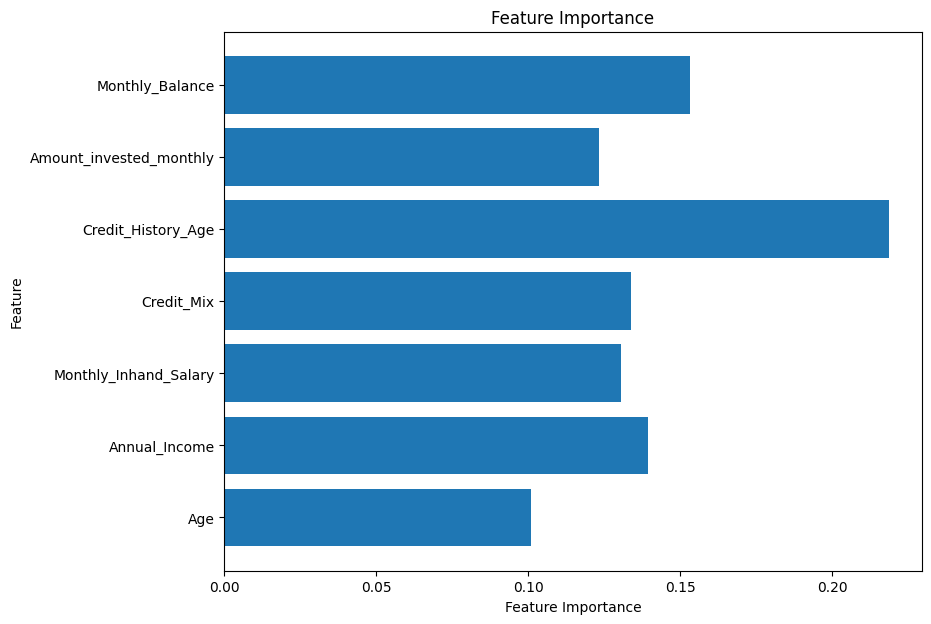

In [23]:
import pandas as pd
import matplotlib.pyplot as plt


# Get feature importances
feature_importance = best_rf_classifier.feature_importances_
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(9,7))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()
